In [49]:
#Importing libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Generate 1000 real number for the variable X from the uniform distribution U
#[0,1]. Construct the training set T = { (x1,y1),(x2,y2),......,(x1000,y1000)} using the relation
#Yi = sin(2 π xi) + εi where εi ~ N(0,0.25).

#Constructing training set

In [50]:
X = np.random.uniform(0,1,1000)
X.sort()
error  = np.random.normal(0,0.25, 1000)
Y = np.sin(2 * 3.14*  X  ) + error
T_train = pd.DataFrame({'X':X , 'Y':Y})

In [51]:
X_train = T_train['X']
Y_train = T_train['Y']

In the similar way construct a testing set of size 50

I,e. Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}.

In [52]:
X = np.random.uniform(0,1,50)
X.sort()
error  = np.random.normal(0,0.25, 50)
Y = np.sin(2 * 3.14*  X  ) + error
T_test = pd.DataFrame({'X':X , 'Y':Y})

In [53]:
X_test = T_test['X']
Y_test = T_test['Y']

#ERRORS FOR EVATIATION

In [54]:
def rmse(y_act,y_pred):
  rmse = np.sqrt(np.sum((y_act - y_pred)**2)/len(y_act))
  return rmse 
def mae(y_act,y_pred):
  mae = (np.abs(y_act - y_pred)).mean()
  return mae

def r2(y_act , y_pred):
  r2 = np.sum((y_act - y_pred)**2)/ np.sum((y_act - y_act.mean())**2 )
  return r2

#Function for plotting

In [55]:
def modeling(y_act,y_pred ,x_test, model_name):
  print("Actual vs prediction for model ",model_name)
  plt.figure(figsize=(15,10))
  plt.scatter(x_test,y_act , color='blue',label="Actual data")
  plt.scatter(x_test,y_pred , color='red',label="predicted data")
  plt.legend()
  plt.show()
  print("ERRORS FOR EVATUTION ")
  print("RMSE VALUE :",rmse(y_act,y_pred))
  print("MAE VALUE :",mae(y_act,y_pred))
  print("R2 VALUE :",r2(y_act,y_pred))

#1. Find the best fit using Least Square gradient descent, considering
#polynomial basis function of order 8. Find the best RMSE MAE and R^2 by
#tuning the value regularization parameter λ. Also obtain the corresponding
#plot of best fit.

#M=8

#Matrix A

In [56]:
def polynomial_basis(x,m): #m is order
  return np.array(x)**m

In [57]:
def matrix_A(x,m):
  A=[]
  for i in range(m,-1,-1):
    A.append(polynomial_basis(x,i))
  A=np.array(A)
  return A.T

In [58]:
A = matrix_A(X_train,8)

#FINING COEFFICIENT 

In [59]:
def find_coeff_mat(lamda,mat_A,Y_train): #U=[w8,w7,......,w1,ones]
  t1= np.dot(lamda,np.identity(9))
  t2= mat_A.T
  t3= np.dot(t2,mat_A)
  t4= t1 + t3
  t5= np.linalg.inv(t4)
  t6= np.dot(t2,Y_train)
  t7= np.dot(t5,t6)
  return t7

#Computing prediction

In [60]:
#Computing prediction
def prediction(U,A):
    fn = A @ U
    return fn

#Finding lambda where rmse is minimum 

In [61]:
tune_set = [ 2**i for i in range(-7, 7)]

In [62]:
#Finding lambda where rmse is minimum 
def lamda_value(X_train,m,Y_train,tune_set):
  min_rmse={}
  for i in tune_set:
    coeff_mat_U =find_coeff_mat(i,matrix_A(X_train,m),Y_train)
    pred = prediction(coeff_mat_U,matrix_A(X_train,m))
    error = rmse(Y_train,pred)
    min_rmse[i] = error
  #Finding minimum rmse from min_rmse
  min_value =min(min_rmse.values())

  Lamda=[]
  #getting keys with minimum value of rmse
  for key in min_rmse:
    if min_rmse[key]==min_value:
      Lamda.append(key)
  print("rmse is minimum for the lamda value :")
  return Lamda

In [63]:
lamda_ = lamda_value(X_train,8,Y_train,tune_set)

rmse is minimum for the lamda value :


#Gradient for regularised loss function

In [64]:
def grad_reg_loss_fun(lamda,w,A,Y):
  w0= w.copy()
  w0[-1]=0
  grad =(lamda*w0 - A.T @ (Y - A @ w))
  return grad

In [65]:
a=matrix_A(X_train,8)
a.shape

(1000, 9)

In [66]:
def get_weight_W(alpha,A,Y,lamda_ ,no_iteration=10000): #aplha =0.0001
  W= np.zeros(A.shape[1]) 
  for i in range(no_iteration):
    W= W - alpha * (grad_reg_loss_fun( lamda_ , W , A,Y ))
  return W

In [67]:
def Polynomial_Regression_GD(X_train,Y_train,X_test,Y_test,order,tune_set,alpha,no_iteration):   # GD means Gradient Descent
  train_A = matrix_A(X_train,order)
  test_A = matrix_A(X_test,order)
  lamda_ = lamda_value(X_train,order,Y_train,tune_set)
  print("lambda_ is",lamda_)
  W = get_weight_W(alpha,train_A,Y_train,lamda_,  no_iteration)
  predicted_Y = prediction(W,test_A)
  modeling(Y_test,predicted_Y,X_test,"Gradient method")

rmse is minimum for the lamda value :
lambda_ is [0.0078125]
Actual vs prediction for model  Gradient method


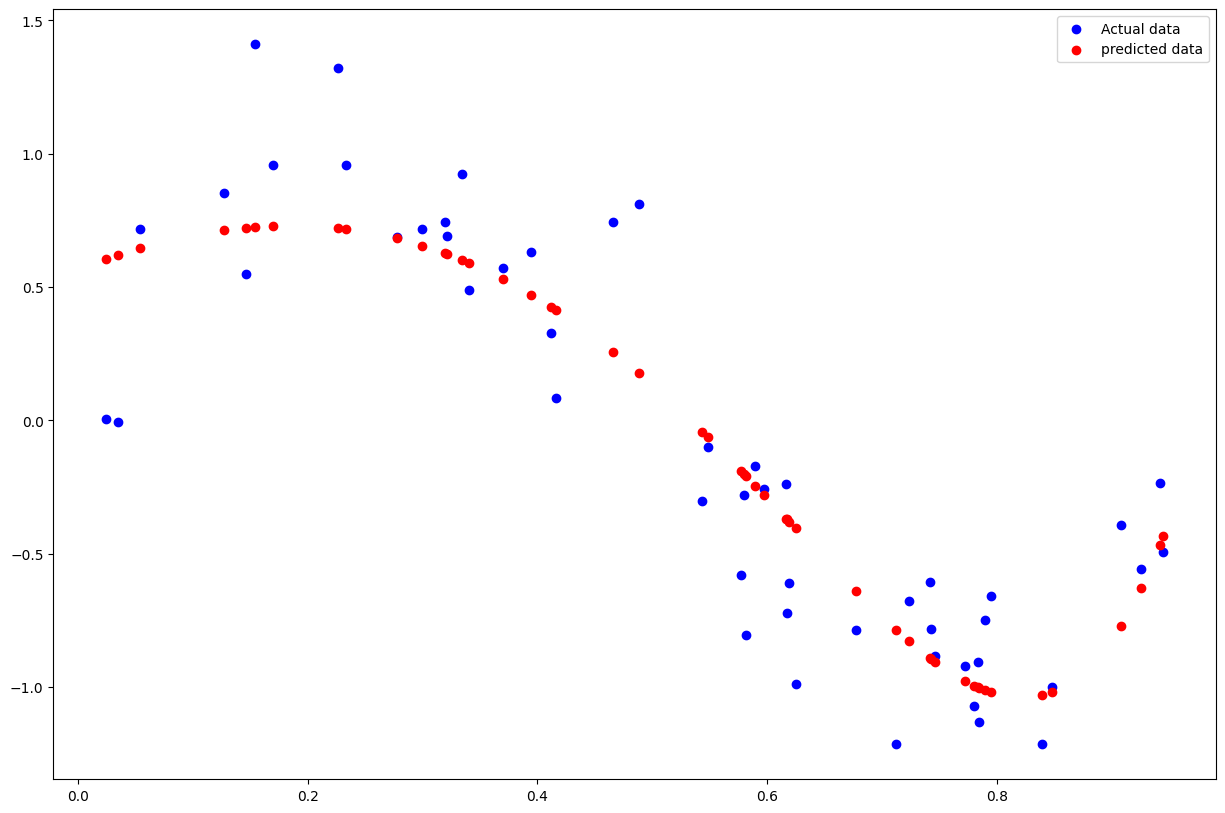

ERRORS FOR EVATUTION 
RMSE VALUE : 0.30319413392393285
MAE VALUE : 0.23266378968574591
R2 VALUE : 0.16670151231614358


In [68]:
Polynomial_Regression_GD(X_train,Y_train,X_test,Y_test,8,tune_set,0.0001,10000)

**2. Find the best fit using a direct method, considering Least Square RBF
(Gaussian) Kernel . Find the best RMSE ,MAE and R^2 by tuning the value
RBF (Gaussian Kernel) and regularization parameter . Also obtain the
corresponding plot of best fit.**

In [93]:
def kernel_matrix(X1, X2, sigma):
    M = len(X1)
    N = len(X2)
    phi = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            norm = np.linalg.norm(X1[i] - X2[j])
            phi[i][j] = np.exp(- (norm / (2*(sigma**2)) ))
    phi = np.hstack((phi, np.ones((M, 1))))
    return phi

In [98]:
from pandas.core.generic import RandomState
def train_kernel_model(X, y):
    lambda_values = [2**i for i in range(-7, -3)]
    sigma_values = [2**i for i in range(-5, 0)]

    U = []

    error_values = []
    sigma_lamnda_pairs = []

    for s in sigma_values:
        phi = kernel_matrix(X, X, s)
        for l in lambda_values:
            try:
                I = np.identity(len(phi.T))
                I[-1][-1] = 0
                u = np.linalg.inv(phi.T @ phi + l*I) @ phi.T @ y

                y_pred = phi @ u

                U.append(u)

                error = rmse(y, y_pred)
                error_values.append(error)
                sigma_lamnda_pairs.append([s, l])

            except np.linalg.LinAlgError as e:
                continue

    min_error_idx = np.argmin(np.array(error_values))
    min_error = error_values[min_error_idx]
    sigma, lambda_ = sigma_lamnda_pairs[min_error_idx]
    best_U = U[min_error_idx]

    print(f"Optimum Lambda: {lambda_}")
    print(f"Optimum Sigma: {sigma}")
    print(f"Training RMSE: {min_error}")

    return best_U, sigma


In [99]:
def kernel_predict(X_test, X_train, sigma, U):
    phi = kernel_matrix(X_test, X_train, sigma)
    y_pred = phi @ U

    return y_pred


Optimum Lambda: 0.0078125
Optimum Sigma: 0.03125
Training RMSE: 0.08719942806222084
Testing RMSE: 0.32376600939915084
Testing MAE: 0.25876340528852376
Testing R^2: 0.19009051860356224


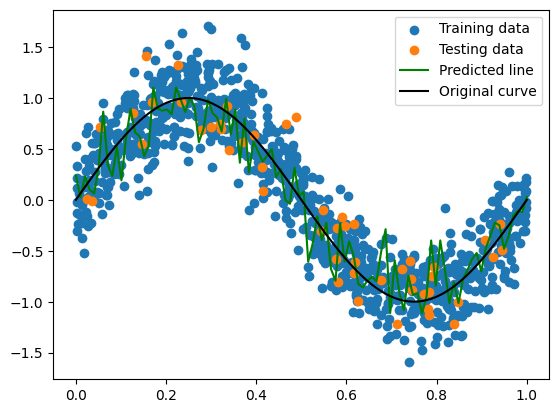

In [101]:
U, sigma = train_kernel_model(X_train, Y_train)
y_test_pred = kernel_predict(X_test, X_train, sigma, U)


print(f"Testing RMSE: {rmse(Y_test, y_test_pred)}")
print(f"Testing MAE: {mae(Y_test, y_test_pred)}")
print(f"Testing R^2: {r2(Y_test, y_test_pred)}")

X_lin = np.linspace(0, 1, 100)
plt.scatter(X_train, Y_train, label="Training data")
plt.scatter(X_test, Y_test, label="Testing data")
plt.plot(X_lin, kernel_predict(X_lin, X_train, sigma, U),
         color="green", label="Predicted line")
plt.plot(X_lin, np.sin(2 * np.pi * X_lin),
         color="black", label="Original curve")
plt.legend()
plt.show()


### 3. Find the best fit using kernel gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter sigma. Also obtain the corresponding plot of best fit.

In [102]:
def kernel_gradient_descent(X, y, sigma=2**-5, lambda_=2**-7, epochs=100000, lr=0.0005, e=0.001):
    i = 0
    A = kernel_matrix(X, X, sigma)
    n = A.shape[1]
    
    U = np.zeros(n)
    U_prev = np.array([-1] * n)

    while i < epochs and np.linalg.norm(U - U_prev) > e:
        U_prev = U
        D_u = lambda_ * U - (A.T @ (y - A @ U))
        U = U - lr * D_u
        i += 1

    print("Iterations:", i)
    
    return U

Iterations: 2151
Testing RMSE: 0.29726760798669605
Testing MAE: 0.22435178946427498
Testing R^2: 0.16024818814007405


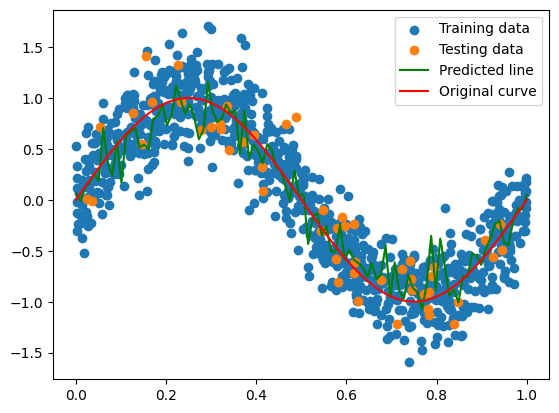

In [103]:
U = kernel_gradient_descent(X_train, Y_train)
y_test_pred = kernel_predict(X_test, X_train, sigma, U)

print(f"Testing RMSE: {rmse(Y_test, y_test_pred)}")
print(f"Testing MAE: {mae(Y_test, y_test_pred)}")
print(f"Testing R^2: {r2(Y_test, y_test_pred)}")

X_lin = np.linspace(0, 1, 100)
plt.scatter(X_train, Y_train, label="Training data")
plt.scatter(X_test, Y_test, label="Testing data")
plt.plot(X_lin, kernel_predict(X_lin, X_train, sigma, U),
         color="green", label="Predicted line")
plt.plot(X_lin, np.sin(2 * np.pi * X_lin),
         color="red", label="Original curve")
plt.legend()
plt.show()

4. Modify the training set T by picking up randomly 20 data points from the training set T and scale their yi values by 25. Find the best fit using normal gradient descent and kernel gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF Gaussian Kernel) and regularization parameter sigma. Also obtain the corresponding plot of best fit.

In [104]:
random_idx = random.sample(list(range(1, 1001)), 20)

In [105]:
Y_train_scaled = Y_train.copy()
Y_train_scaled[random_idx] = Y_train_scaled[random_idx] * 25
Y_train_scaled[random_idx]

146    12.597899
537   -13.080256
592    -8.357341
497    10.820313
150    36.609504
855   -28.590789
353    15.695972
811   -30.607714
734   -29.841966
181    23.721882
393    27.359483
104    24.877596
396    14.559234
226    32.225341
923    -9.074012
11     -1.229062
770   -36.945250
332    24.702385
708   -19.014292
8       1.729062
Name: Y, dtype: float64

In [106]:
def gradient_descent(A, y, order, lambda_, epochs=90000, lr=0.0001):
    e = 0.0001
    i = 0
    W = np.zeros(order + 1)
    W_prev = np.array([-1] * (order + 1))

    while i < epochs and np.linalg.norm(W - W_prev) > e:
        W_prev = W
        D_w = lambda_ * W - A.T @ (y - A @ W)
        W = W - lr * D_w
        i += 1
    print("Iterations:", i)
    return W

In [107]:
def create_matrix(X, order):
    A = np.array([np.power(X, i) for i in range(order, -1, -1)]).T
    return A

In [108]:
def train_model(X, y, order):
    lambda_values = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25]
    A = create_matrix(X, order)
    W_arr = []
    error_values = np.zeros(len(lambda_values))
    
    for i, l in enumerate(lambda_values):
        w = gradient_descent(A, y, order, l)
        W_arr.append(w)

        y_pred = A @ W_arr[i]

        error = rmse(y, y_pred)
        error_values[i] = error

    min_error_idx = np.argmin(error_values)
    W = W_arr[min_error_idx]

    return W

In [111]:
def predict(X, W, order):
    A = create_matrix(X, order)
    return A @ W

In [118]:
def plot_model(X_train, Y_train, X_test, Y_test, W, order):
    X_lin = np.linspace(0, 1, 100)

    plt.scatter(X_train, Y_train, label="Training data")
    plt.scatter(X_test, Y_test, label="Testing data")
    plt.plot(X_lin, predict(X_lin, W, order),
             color="red", label="Predicted line")
    plt.plot(X_lin, np.sin(2 * np.pi * X_lin),
             color="black", label="Original curve")
    plt.legend()
    plt.show()


Iterations: 90000
Iterations: 90000
Iterations: 88882
Iterations: 65295
Iterations: 51602
Iterations: 42657
Iterations: 36355
Testing RMSE: 0.5199424729346959
Testing MAE: 0.45369704499725927
Testing R^2: 0.4902397720015449


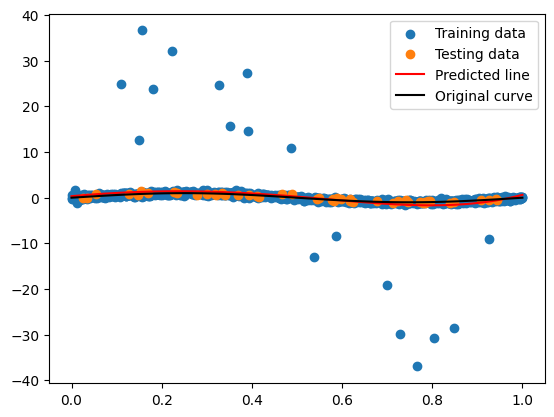

In [119]:
order = 8
W = train_model(X_train, Y_train_scaled, order)
y_test_pred = predict(X_test,W,8)

print(f"Testing RMSE: {rmse(Y_test, y_test_pred)}")
print(f"Testing MAE: {mae(Y_test, y_test_pred)}")
print(f"Testing R^2: {r2(Y_test, y_test_pred)}")
plot_model(X_train, Y_train_scaled, X_test, Y_test, W, order)


Iterations: 127
Testing RMSE: 0.7165436117841985
Testing MAE: 0.6395383203578917
Testing R^2: 0.9310718743348372


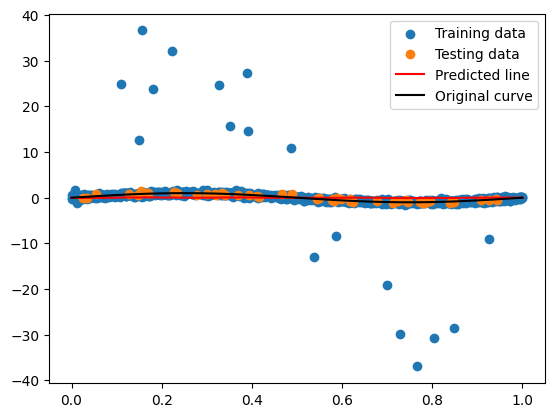

In [120]:
U = kernel_gradient_descent(X_train, Y_train_scaled, sigma = 2**-2, lambda_=2**-7, lr=0.00001)
y_test_pred = kernel_predict(X_test, X_train, sigma, U)

print(f"Testing RMSE: {rmse(Y_test, y_test_pred)}")
print(f"Testing MAE: {mae(Y_test, y_test_pred)}")
print(f"Testing R^2: {r2(Y_test, y_test_pred)}")

X_lin = np.linspace(0, 1, 100)
plt.scatter(X_train, Y_train_scaled, label="Training data")
plt.scatter(X_test, Y_test, label="Testing data")
plt.plot(X_lin, kernel_predict(X_lin, X_train, sigma, U),
         color="red", label="Predicted line")
plt.plot(X_lin, np.sin(2 * np.pi * X_lin),
         color="black", label="Original curve")
plt.legend()
plt.show()

5. Consider the motorcycle dataset. Find the best fit using Least Square kernel Regression using stochastic gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter .Also obtain the corresponding plot of best fit.

In [114]:
motorcycle_df = pd.read_csv('/content/motorcycle - motorcycle - motorcycle - motorcycle.csv')

In [115]:
df_X = motorcycle_df['x'].to_numpy()
df_Y = motorcycle_df['y'].to_numpy()

In [116]:
def stochastic_gd(X, Y, sigma=2**-5, lambda_=2**-7, batch_size=1, epochs=100000, lr=0.01, e=0.001):
    i = 0
    n = len(X)

    U = np.zeros(batch_size + 1)
    U_prev = np.array([-1] * (batch_size + 1))

    while i < epochs and np.linalg.norm(U - U_prev) > e:
        idx = np.random.randint(0, n, batch_size)
        x = X[idx]
        y = Y[idx]
        A = kernel_matrix(x, x, sigma)

        U_prev = U
        D_u = lambda_ * U - (A.T @ (y - (A @ U)))
        U = U - lr * D_u
        i += 1

    print("Iterations:", i)

    return U

Iterations: 184
Testing RMSE: 49.51227240130105
Testing MAE: 36.618608874053876
Testing R^2: 1.0578223145877155


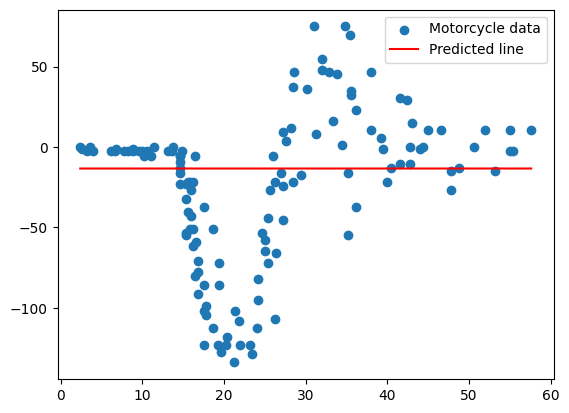

In [117]:
batch_size = 1

U = stochastic_gd(df_X, df_Y, epochs=10000, sigma=0.25, batch_size=batch_size, lr=0.1)

idx = np.random.randint(0, df_X.shape[0], batch_size)
X_t, Y_t = df_X[idx], df_Y[idx]

y_test_pred = kernel_predict(df_X, X_t, sigma, U)

print(f"Testing RMSE: {rmse(df_Y, y_test_pred)}")
print(f"Testing MAE: {mae(df_Y, y_test_pred)}")
print(f"Testing R^2: {r2(df_Y, y_test_pred)}")

X_lin = np.linspace(min(df_X), max(df_X), 1000)
plt.scatter(df_X, df_Y, label="Motorcycle data")
plt.plot(X_lin, kernel_predict(X_lin, X_t, sigma, U),
         color="red", label="Predicted line")
plt.legend()
plt.show()
